#1 Loading Data


In [1]:
# Import related packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

# Set sns style
sns.set(style="white",context="notebook",palette="muted")
import matplotlib.pyplot as plt

# Import data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#2 Data Exploration


#2.1 Data View

In [2]:
print("Training data size :", train.shape)
print("Testing data size :", test.shape)

Training data size : (891, 12)
Testing data size : (418, 11)


In [3]:
# Compare the differences between training and testing data
display(train.head(),test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#2.2 Data Merge

In [4]:
# Merge two datasets so they can be processed together
full = pd.concat([train,test],ignore_index=True)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#2.3 Check info() details

In [6]:
full.info()
# Missing Values：Survived（test）, Age, Fare, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#2.4  The relationship between features and labels

#2.4.1 The relationship between Embarked and Survived

<Axes: xlabel='Embarked', ylabel='Survived'>

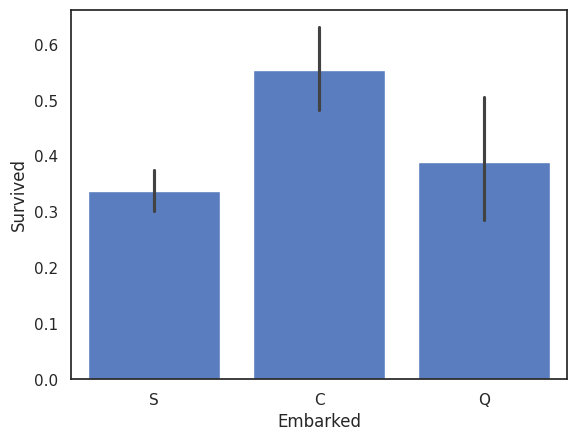

In [7]:
sns.barplot(data=train,x="Embarked",y="Survived")

In [9]:
# Calculate the survival rate of different types of Embarked passengers
s = full.groupby("Embarked")["Survived"].value_counts().reset_index(name='count')
total_counts = s.groupby('Embarked')['count'].sum().rename('total')
s = s.merge(total_counts, on='Embarked')
s['rate'] = s['count'] / s['total']
result = s[['Embarked', 'Survived', 'count', 'rate']]
result

,Embarked,Survived,count,rate
0,C,1.0,93,0.553571
1,C,0.0,75,0.446429
2,Q,0.0,47,0.610390
3,Q,1.0,30,0.389610
4,S,0.0,427,0.663043
5,S,1.0,217,0.336957


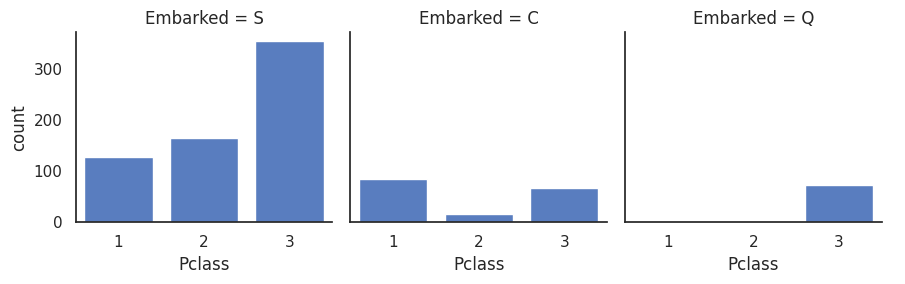

In [10]:
sns.catplot(x='Pclass',col='Embarked',data=train,kind='count',height=3,aspect=1)

#2.4.2 The relationship between Parch and Survived

<Axes: xlabel='Parch', ylabel='Survived'>

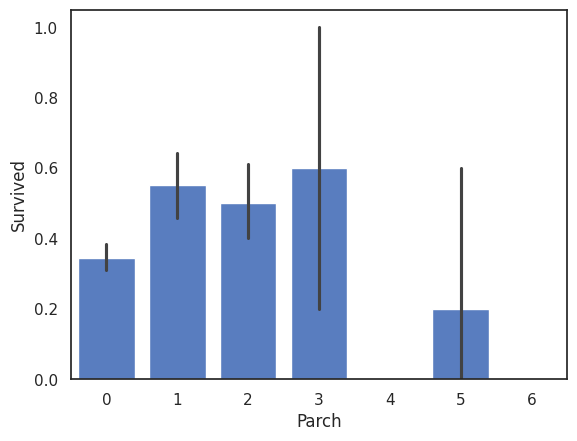

In [11]:
sns.barplot(data=train,x="Parch",y="Survived")

#2.4.3 The relationship between SibSp and Survived

<Axes: xlabel='SibSp', ylabel='Survived'>

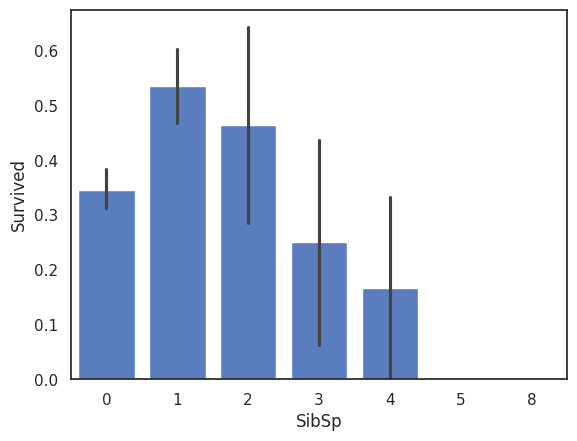

In [12]:
sns.barplot(data=train,x="SibSp",y="Survived")

#2.4.4 The relationship between Pclass and Survived

<Axes: xlabel='Pclass', ylabel='Survived'>

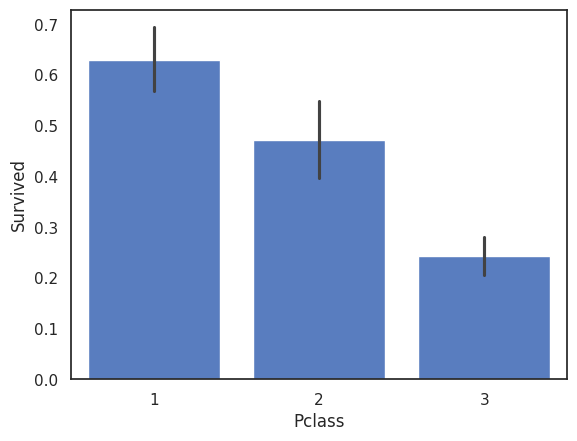

In [13]:
sns.barplot(data=train,x="Pclass",y="Survived")

#2.4.5 The relationship between Sex and Survived

<Axes: xlabel='Sex', ylabel='Survived'>

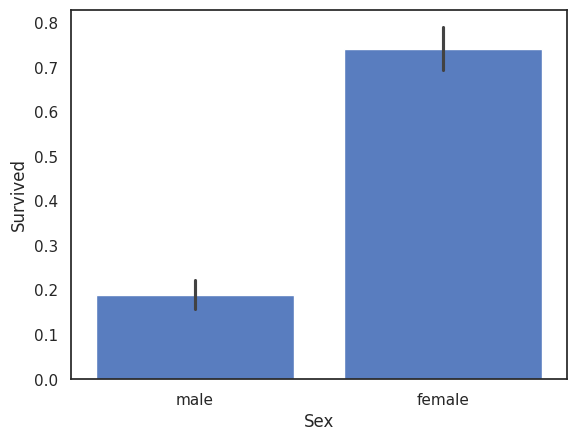

In [14]:
sns.barplot(data=train,x="Sex",y="Survived")

#2.4.6 The relationship between Fare and Survived

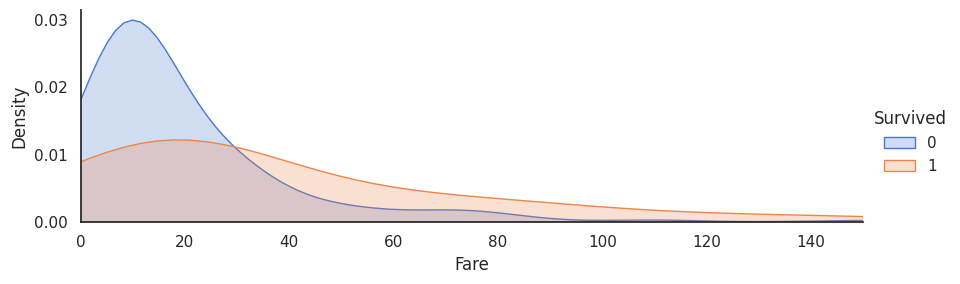

In [15]:
# 创建分面网格图（初始化）
# aspect：图片的纵横比，宽是高的3倍
ageFacet = sns.FacetGrid(train,hue='Survived',aspect=3)
# 概率密度函数
ageFacet.map(sns.kdeplot,'Fare',shade=True)
# 设置x轴的长度
ageFacet.set(xlim=(0,150))
# 添加图例
ageFacet.add_legend()

#2.4.7 Ticket price distribution

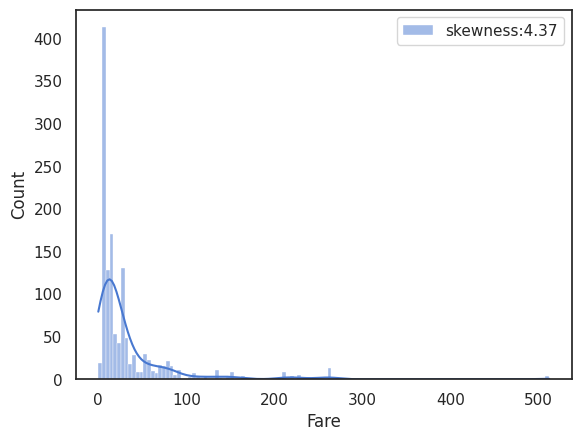

In [16]:
farePlot = sns.histplot(full['Fare'][full['Fare'].notnull()],
              kde=True,label=f'skewness:{full["Fare"].skew():.2f}')# skew:偏态（下图为往左偏）
plt.legend(loc='best')
plt.show()

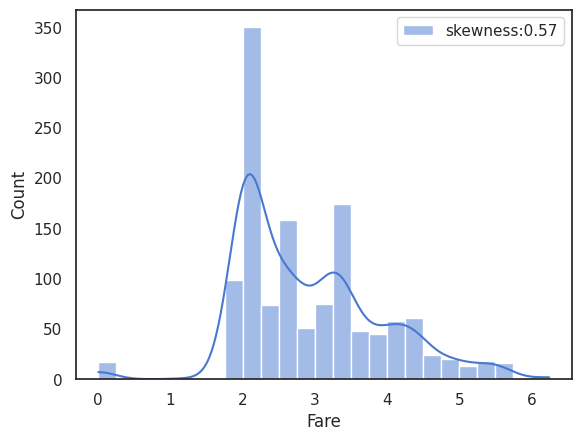

In [17]:
# 对数化处理Fare值
full['Fare']=full['Fare'].map(lambda x:np.log(x) if x>0 else x)

# 处理之后的Fare票价分布
farePlot = sns.histplot(full['Fare'][full['Fare'].notnull()],
              kde=True,label=f'skewness:{full["Fare"].skew():.2f}')
plt.legend(loc='best')
plt.show()


#2.5 Data Proprecessing

#2.5.1 Data Cleaning

In [18]:
# 对Cabin进行缺失值处理，用U（Unknown）填充
full['Cabin'] = full['Cabin'].fillna('U')
full['Cabin'].head()

,Cabin
0,U
1,C85
2,U
3,C123
4,U


In [20]:
# 对Embarked进行缺失值处理，查看缺失值状况
display(full[full['Embarked'].isnull()])
display(full['Embarked'].value_counts())
# 根据分布情况，可知在S登船的可能性最大，因此以此来填充缺失值
full['Embarked'] = full['Embarked'].fillna('S')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


,count
Embarked,
S,916
C,270
Q,123


In [21]:
# 对Fare进行缺失值处理，查看缺失值状况
# 该乘客乘坐3等舱，登船港口为S,舱位未知
display(full[full['Fare'].isnull()])
# 利用3等舱，登船港口为S，舱位未知的旅客的平均票价来填充缺失值
price = full[(full['Pclass']==3) & (full['Embarked']=='S') & (full['Cabin']=='U')]['Fare'].median()
full['Fare'] = full['Fare'].fillna(price)
full.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#2.6 Feature Engineering

#2.6.1 Title

In [22]:
# 创建新特征Title
full['Title'] = full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
# 查看Title分布
full['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mlle,2


In [23]:
# 将Title信息进行整合，方便后续建模
TitleDict = {}
TitleDict['Mr'] = 'Mr'
TitleDict['Mlle'] = 'Miss'
TitleDict['Miss'] = 'Miss'
TitleDict['Master'] = 'Master'
TitleDict['Jonkheer'] = 'Master'
TitleDict['Mme'] = 'Mrs'
TitleDict['Ms'] = 'Mrs'
TitleDict['Mrs'] = 'Mrs'
TitleDict['Don'] = 'Royalty'
TitleDict['Sir'] = 'Royalty'
TitleDict['the Countess'] = 'Royalty'
TitleDict['Lady'] = 'Royalty'
TitleDict['Dona'] = 'Royalty'
TitleDict['Capt'] = 'Officer'
TitleDict['Col'] = 'Officer'
TitleDict['Major'] = 'Officer'
TitleDict['Dr'] = 'Officer'
TitleDict['Rev'] = 'Officer'

full['Title'] = full['Title'].map(TitleDict)
full['Title'].value_counts()

,count
Title,
Mr,757
Miss,262
Mrs,200
Master,62
Officer,23
Royalty,5


<Axes: xlabel='Title', ylabel='Survived'>

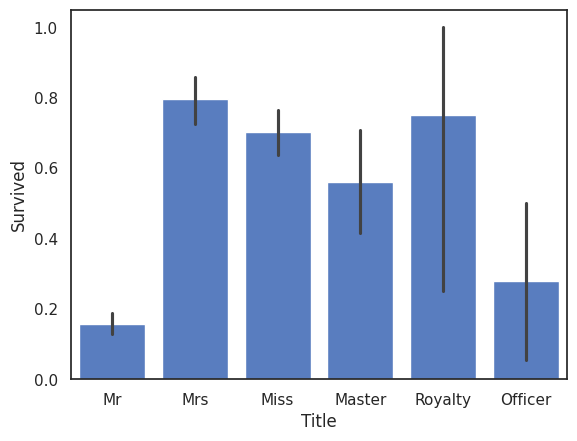

In [24]:
# 可视化Title和Survived之间的关系
sns.barplot(data=full,x='Title',y='Survived')

#2.6.2 FamilyNum

<Axes: xlabel='familynum', ylabel='Survived'>

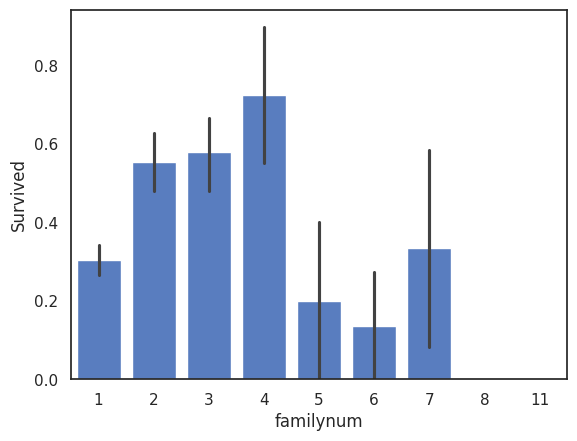

In [25]:
full['familynum'] = full['Parch'] + full['SibSp'] + 1# +1相当于把自己算进去
sns.barplot(data=full,x='familynum',y='Survived')

In [26]:
# 按照家庭成员的多少进行聚类，将家庭规模分为小（0）、中（1）、大（2）
def familysize(familynum):
  if familynum==1:
    return 0
  elif (familynum>=2)&(familynum<=4):
    return 1
  else:
    return 2

full['familysize'] = full['familynum'].map(familysize)
full['familysize'].value_counts()


,count
familysize,
0,790
1,437
2,82


<Axes: xlabel='familysize', ylabel='Survived'>

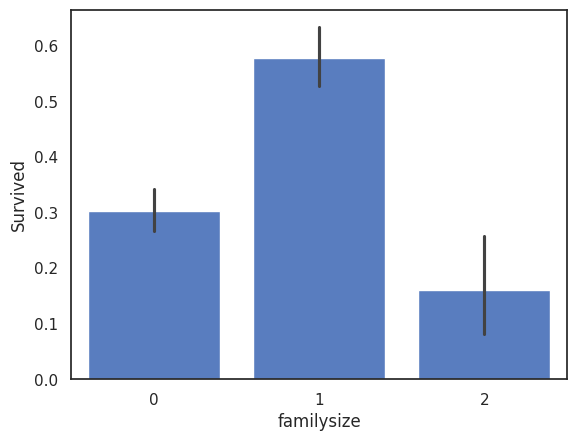

In [27]:
sns.barplot(data=full,x='familysize',y='Survived')

#2.6.3 Cabin Type

In [28]:
full['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<Axes: xlabel='Deck', ylabel='Survived'>

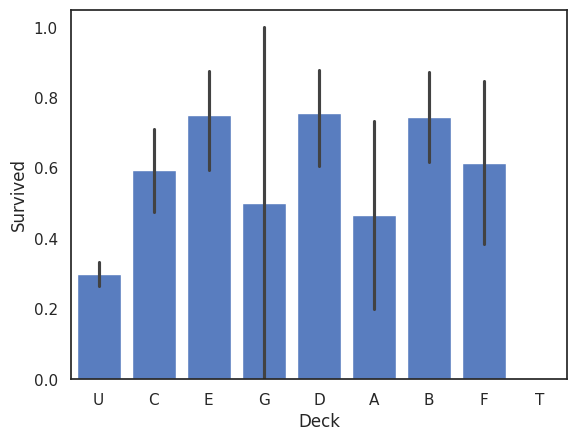

In [29]:
full['Deck'] = full['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)
sns.barplot(data=full,x='Deck',y='Survived')

#2.6.4 共票号乘客数量Tickcom及Tickgroup

In [30]:
# 提取各票号的乘客数量
TickCountDict = full['Ticket'].value_counts()
TickCountDict.head(10)

,count
Ticket,
CA. 2343,11
1601,8
CA 2144,8
347082,7
S.O.C. 14879,7
3101295,7
PC 17608,7
347077,7
382652,6


<Axes: xlabel='Tickcom', ylabel='Survived'>

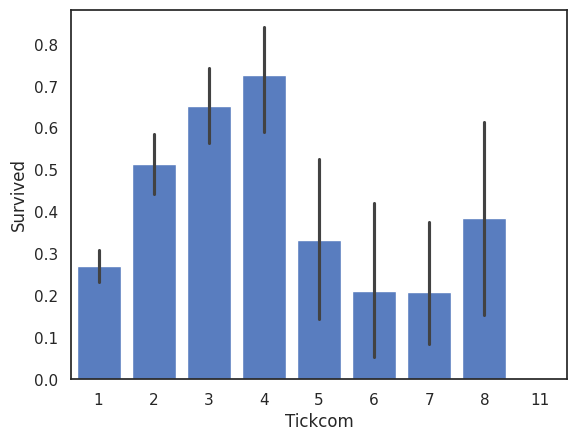

In [31]:
# 将同票号乘客数量数据并入数据集中
full['Tickcom'] = full['Ticket'].map(TickCountDict)
full['Tickcom'].head()
sns.barplot(data=full,x='Tickcom',y='Survived')

<Axes: xlabel='Tickgroup', ylabel='Survived'>

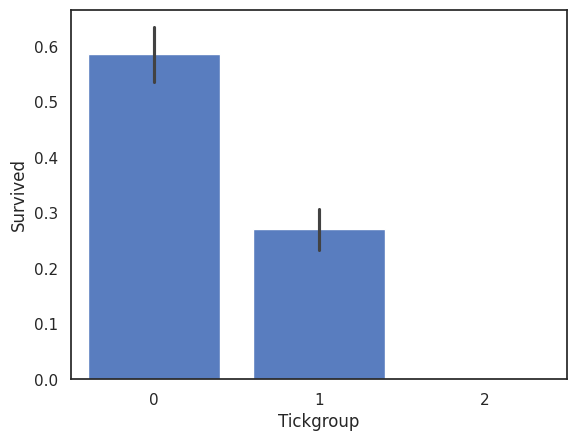

In [32]:
def Tickcountgroup(num):
  if (num>=2)&(num<=4):
    return 0
  elif (num==1)|(num>=5)&(num<=8):
    return 1
  else:
    return 2

full['Tickgroup'] = full['Tickcom'].map(Tickcountgroup)
sns.barplot(data=full,x='Tickgroup',y='Survived')

#2.7 填充Age年龄

In [33]:
# 选择数值型列进行相关性计算
numeric_columns = full.select_dtypes(include=['float64', 'int64']).columns
numeric_data = full[numeric_columns]
correlation_matrix = numeric_data.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,familynum,familysize,Tickcom,Tickgroup
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.018212,-0.031437,-0.047985,-0.010350,0.007477
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.331805,0.016639,0.108631,0.064962,-0.319278
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.694566,0.050027,-0.067487,-0.078554,0.308877
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.193300,-0.240229,-0.174901,-0.185284,-0.005224
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.316096,0.861952,0.750411,0.679444,-0.021512
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.327375,0.792296,0.687001,0.647029,-0.089695
Fare,0.018212,0.331805,-0.694566,0.193300,0.316096,0.327375,1.000000,0.386847,0.471980,0.584908,-0.399869
familynum,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.386847,1.000000,0.869082,0.800556,-0.063174
familysize,-0.047985,0.108631,-0.067487,-0.174901,0.750411,0.687001,0.471980,0.869082,1.000000,0.667312,-0.355482
Tickcom,-0.010350,0.064962,-0.078554,-0.185284,0.679444,0.647029,0.584908,0.800556,0.667312,1.000000,-0.111638


In [34]:
# 筛选数据集
Agepre = full[['Pclass','Age','SibSp','Parch','familynum','Tickcom','Title']]
# 对字符串进行onehot编码
Agepre = pd.get_dummies(Agepre)
Agecorrdf = Agepre.corr()
Agecorrdf['Age'].sort_values()

,Age
Pclass,-0.408106
Title_Master,-0.385380
Title_Miss,-0.282977
SibSp,-0.243699
familynum,-0.240229
Tickcom,-0.185284
Parch,-0.150917
Title_Royalty,0.057337
Title_Officer,0.166771
Title_Mr,0.183965


In [35]:
Agepre.head()

,Pclass,Age,SibSp,Parch,familynum,Tickcom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,22.0,1,0,2,1,False,False,True,False,False,False
1,1,38.0,1,0,2,2,False,False,False,True,False,False
2,3,26.0,0,0,1,1,False,True,False,False,False,False
3,1,35.0,1,0,2,2,False,False,False,True,False,False
4,3,35.0,0,0,1,1,False,False,True,False,False,False


In [36]:
# 拆分实验集和预测集
# 根据非空数据规律对空数据进行填充
Ageknown = Agepre[Agepre['Age'].notnull()] # 非空数据
Ageunknown = Agepre[Agepre['Age'].isnull()] # 空数据
# 生成实验数据的特征和标签
Ageknown_X = Ageknown.drop(['Age'],axis=1)
Ageknown_y = Ageknown['Age']
# 生成预测数据的特征
Ageunknown_X = Ageunknown.drop(['Age'],axis=1)
# 利用随机森林构建模型
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(Ageknown_X,Ageknown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [105]:
# 模型得分
score = rfr.score(Ageknown_X,Ageknown_y)
print('模型预测年龄得分是： ', score)
# 预测年龄
Ageunknown_predict = rfr.predict(Ageunknown_X)
# 填充预测数据
# 确保Ageunknown_predict的长度与缺失值的数量一致
if len(Ageunknown_predict) == full['Age'].isnull().sum():
    full.loc[full['Age'].isnull(), 'Age'] = Ageunknown_predict
else:
    print("Warning: Length mismatch between missing values and predictions.")
full.info()

模型预测年龄得分是：  0.5860464868218012
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familynum    1309 non-null   int64  
 14  familysize   1309 non-null   int64  
 15  Tickcom      1309 non-null   int64  
 16  Tickgroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(6)
memory usage: 174.0+ KB


#2.8 Same group identification(同组识别)

In [40]:
# 提取乘客的姓氏以及相应的乘客数
full['Surname'] = full['Name'].map(lambda x:x.split(',')[0].strip())
Surnamedict = full['Surname'].value_counts()
full['Surnamenum'] = full['Surname'].map(Surnamedict)
# 12岁以上男性：找出男性中同性氏均获救的部分
Maledf = full[(full['Sex']=='male')&(full['Age']>12)&(full['familynum']>=2)]
# 分析男性同组效应
Msurnamedf = Maledf['Survived'].groupby(Maledf['Surname']).mean()
Msurnamedf.head()
Msurnamedf.value_counts()
# 结论：大多数同性氏男生存在“同生共死"的特点,对幸存（1.0）的男生数据提升其预测
# 为“可以幸存"的概率

,count
Survived,
0.0,80
1.0,18
0.5,3


In [41]:
# 提取乘客的姓氏以及相应的乘客数
full['Surname'] = full['Name'].map(lambda x:x.split(',')[0].strip())
Surnamedict = full['Surname'].value_counts()
full['Surnamenum'] = full['Surname'].map(Surnamedict)
# 将数据分为两组
FemChilddf = full[(full['Sex']=='female')|(full['Age']<=12)&(full['familynum']>=2)]

FCSurnamedf = FemChilddf['Survived'].groupby(FemChilddf['Surname']).mean()
FCSurnamedf.head()
FCSurnamedf.value_counts()
# 结论：女性及儿童也存在“同生共死"的特点，对遇难（0.0）的女性及儿童数据提升其
# 预测为“并未幸存"的概率

,count
Survived,
1.000000,207
0.000000,54
0.750000,2
0.333333,1
0.142857,1


In [44]:
# 获得生存率为1的姓氏
MSurnamedict = Msurnamedf[Msurnamedf.values == 1].index
MSurnamedict

# 获得生存率为0的姓氏
FCSurnamedict = FCSurnamedf[FCSurnamedf.values == 0].index
FCSurnamedict

# 对数据集中这些姓氏的男性数据进行修正：1、性别改为女；2、年龄改为5。
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(MSurnamedict)) & (full['Sex'] == 'male'), 'Sex'] = 'female'
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(MSurnamedict)) & (full['Sex'] == 'male'), 'Age'] = 5

# 对数据集中这些姓氏的女性及儿童的数据进行修正：1、性别改为男；2、年龄改为60。
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(FCSurnamedict)) & ((full['Sex'] == 'female') | (full['Age'] <= 12)), 'Sex'] = 'male'
full.loc[(full['Survived'].isnull()) & (full['Surname'].isin(FCSurnamedict)) & ((full['Sex'] == 'female') | (full['Age'] <= 12)), 'Age'] = 60

#2.9 Conditional Filter（条件筛选）

In [45]:
# 人工筛选
fullsel = full.drop(['Cabin','Name','Ticket','PassengerId','Surname','Surnamenum'],axis=1)
# 选择数值型列进行相关性计算
numeric_columns = fullsel.select_dtypes(include=['float64', 'int64']).columns
numeric_data = fullsel[numeric_columns]
# 计算相关性矩阵
corrdf = numeric_data.corr()
# 查看各特征与标签的相关性
corrdf['Survived'].sort_values(ascending=True)

,Survived
Pclass,-0.338481
Tickgroup,-0.319278
Age,-0.077221
SibSp,-0.035322
familynum,0.016639
Tickcom,0.064962
Parch,0.081629
familysize,0.108631
Fare,0.331805
Survived,1.000000


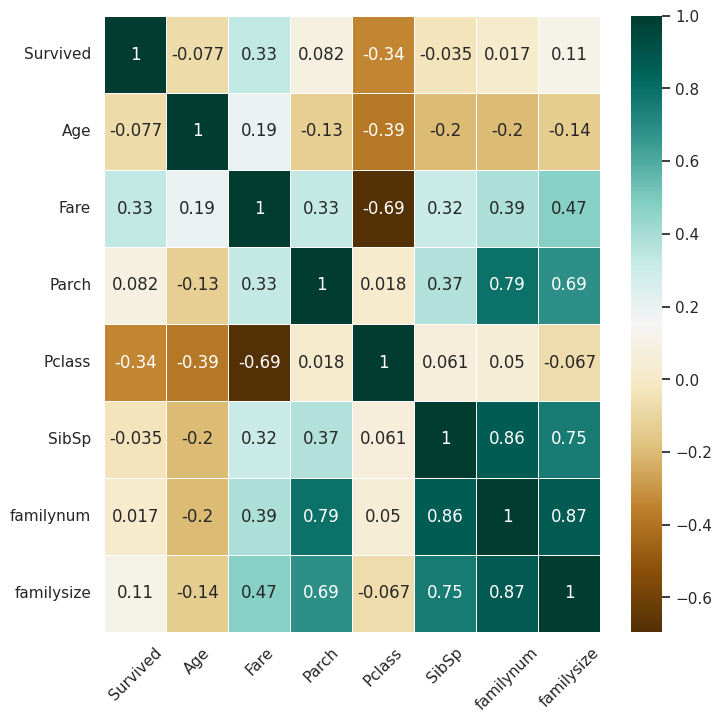

In [51]:
# 热力图，查看Survived与其特征间相关性大小
plt.figure(figsize=(8, 8))
# 选择数值型列进行相关性计算
numeric_columns = ['Survived', 'Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'familynum', 'familysize']
numeric_data = fullsel[numeric_columns]
# 计算相关性矩阵并绘制热力图
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, cmap='BrBG', annot=True, linewidths=.5)

_ = plt.xticks(rotation=45)
plt.show()

In [53]:
# 删除相关性低的属性
fullsel = fullsel.drop(['Age', 'Parch', 'SibSp', 'familynum', 'Tickcom'], axis=1)
# one-hot编码
fullsel = pd.get_dummies(fullsel)
fullsel.head()

,Survived,Pclass,Fare,familysize,Tickgroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,1.981001,1,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,4.266662,1,0,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,3,2.070022,0,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1,3.972177,1,0,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0.0,3,2.085672,0,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


#3. Algorithm Modeling（算法建模）


#3.1 Model selection（模型选择）

In [100]:
# 拆分实验数据与预测数据
experData = fullsel[fullsel['Survived'].notnull()] # 已有数据
predData = fullsel[fullsel['Survived'].isnull()] # 预测数据
# 准备实验数据的特征和标签
experData_X = experData.drop('Survived', axis=1)
experData_y = experData['Survived']
# 准备预测数据的特征
predData_X = predData.drop('Survived', axis=1) # 空数据
# 导入机器学习算法库
# 随机森林、梯度提升树、额外树、线性判别分析、逻辑回归、K近邻分类器、决策树分类器、支持向量机
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# 模型选择和评估工具：网格搜索、交叉验证评分和分层K折交叉验证
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# 设置kFold，交叉验证法分割数据集
kfolds = StratifiedKFold(n_splits=10)
# 汇总不同模型算法
classifiers = []
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [79]:
# 不同机器学习交叉验证结果汇总
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, experData_X, experData_y,
                                      scoring='accuracy', cv=kfolds, n_jobs=-1))

# 求出模型得分的均值和标准差
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# 汇总数据
cvResDf = pd.DataFrame({'cv_mean': cv_means,
              'cv_std': cv_std,
              'algorithm': ['SVC', 'DecisionTreeCla', 'RandomForestCla',
                      'ExtraTreesCla', 'GradientBoostingCla', 'KNN', 'LR', 'LDA']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.835019,0.035179,SVC
1,0.805843,0.026555,DecisionTreeCla
2,0.820449,0.035750,RandomForestCla
3,0.812609,0.030291,ExtraTreesCla
4,0.829426,0.040034,GradientBoostingCla
5,0.823795,0.039569,KNN
6,0.830549,0.038304,LR
7,0.828327,0.039658,LDA


[(0.7, 0.9)]

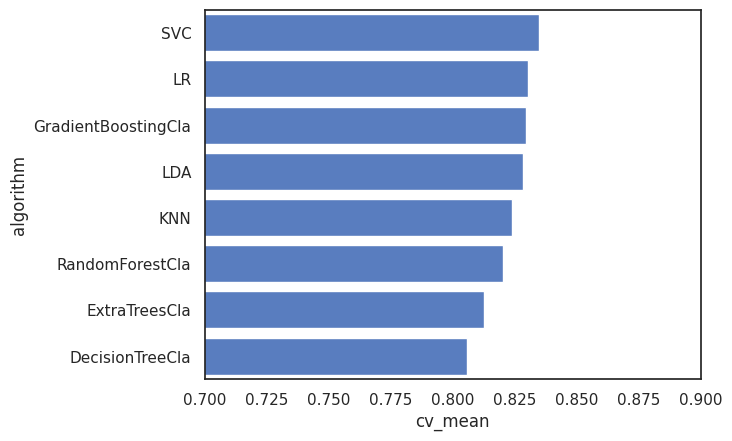

In [80]:
bar = sns.barplot(data=cvResDf.sort_values(by='cv_mean', ascending=False),
                  x='cv_mean', y='algorithm')
bar.set(xlim=(0.7, 0.9))
# 结论：SVC, LR, GradientBoostingClassifier, LDA四个模型表现良好

#3.2 Model Tuning（模型调优）

In [89]:
# SVC模型
svc = SVC()
gb_param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 5, 10],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
modelGsSVC = GridSearchCV(svc, param_grid=gb_param_grid, cv=kfolds,
                          scoring="accuracy", n_jobs=-1, verbose=1)
modelGsSVC.fit(experData_X, experData_y)
modelGsSVC.best_score_

Fitting 10 folds for each of 21 candidates, totalling 210 fits


np.float64(0.8350187265917602)

In [90]:
# LR模型
modelLR = LogisticRegression()
LR_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'fit_intercept': [True, False]
}
modelGsLR = GridSearchCV(modelLR, param_grid=LR_param_grid, cv=kfolds,
              scoring="accuracy", n_jobs=-1, verbose=1)
modelGsLR.fit(experData_X, experData_y)
modelGsLR.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


np.float64(0.83167290886392)

In [91]:
# GradientBoostingClassifier模型
GBC = GradientBoostingClassifier()
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4, 8],
    'min_samples_leaf': [100, 150],
    'max_features': [0.3, 0.1]
}
modelGsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=kfolds,
                          scoring="accuracy", n_jobs=-1, verbose=1)
modelGsGBC.fit(experData_X, experData_y)
modelGsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


np.float64(0.838414481897628)

In [92]:
# LDA模型
lda = LinearDiscriminantAnalysis()
gb_param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01]
}
modelGsLDA = GridSearchCV(lda, param_grid=gb_param_grid, cv=kfolds,
                          scoring="accuracy", n_jobs=-1, verbose=1)
modelGsLDA.fit(experData_X, experData_y)
modelGsLDA.best_score_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


np.float64(0.8283270911360798)

#3.3 Model Evaluation（模型评估）

<Figure size 640x480 with 0 Axes>

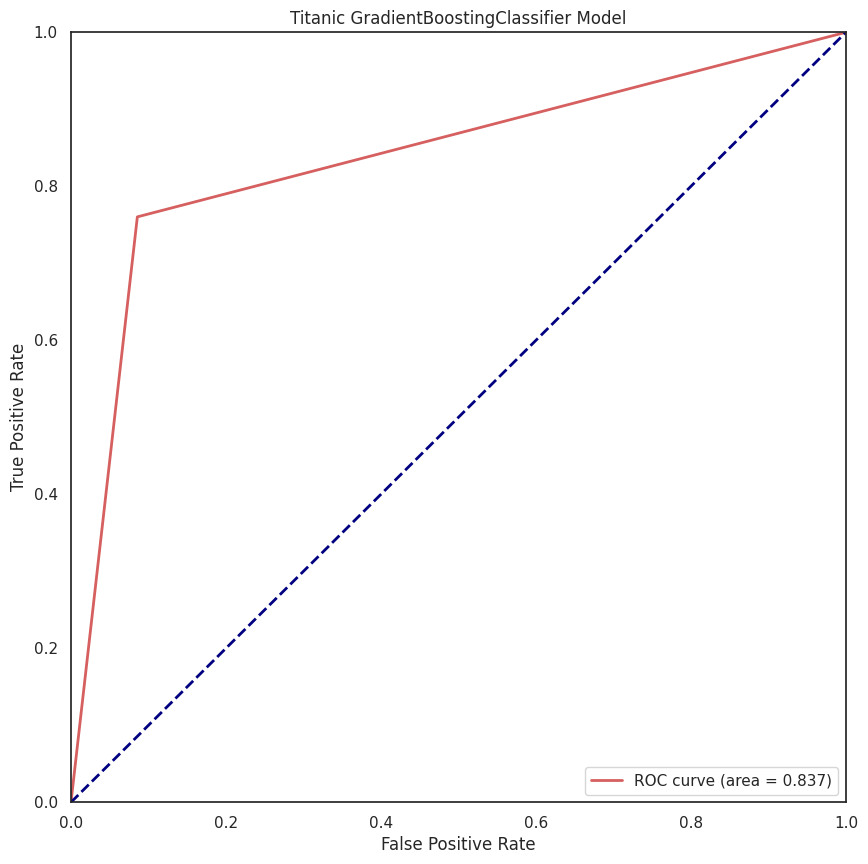

In [93]:
# 查看模型ROC曲线
# 获取测试数据模型的预测值
# GradientBoostingClassifier模型
modelGsGBCtestpre_y = modelGsGBC.predict(experData_X).astype(int)

# 画图
from sklearn.metrics import roc_curve, auc  # 导入计算roc和auc的函数

# 计算ROC曲线和ROC面积
fpr, tpr, threshold = roc_curve(experData_y, modelGsGBCtestpre_y)  # 计算真正率和假正率
roc_auc = auc(fpr, tpr)  # 计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

<Figure size 640x480 with 0 Axes>

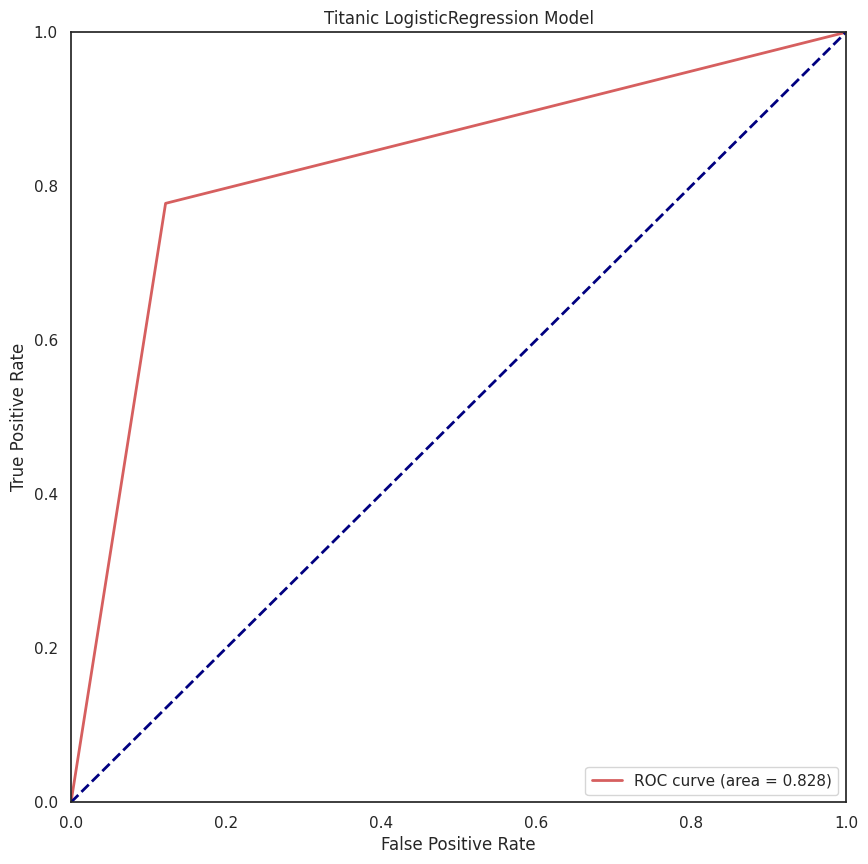

In [94]:
# 查看模型ROC曲线
# 获取测试数据模型的预测值
# LR模型
modelGsLRtestpre_y = modelGsLR.predict(experData_X).astype(int)

# 画图
from sklearn.metrics import roc_curve, auc  # 导入计算roc和auc的函数

# 计算ROC曲线和ROC面积
fpr, tpr, threshold = roc_curve(experData_y, modelGsLRtestpre_y)  # 计算真正率和假正率
roc_auc = auc(fpr, tpr)  # 计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic LogisticRegression Model')
plt.legend(loc="lower right")
plt.show()

<Figure size 640x480 with 0 Axes>

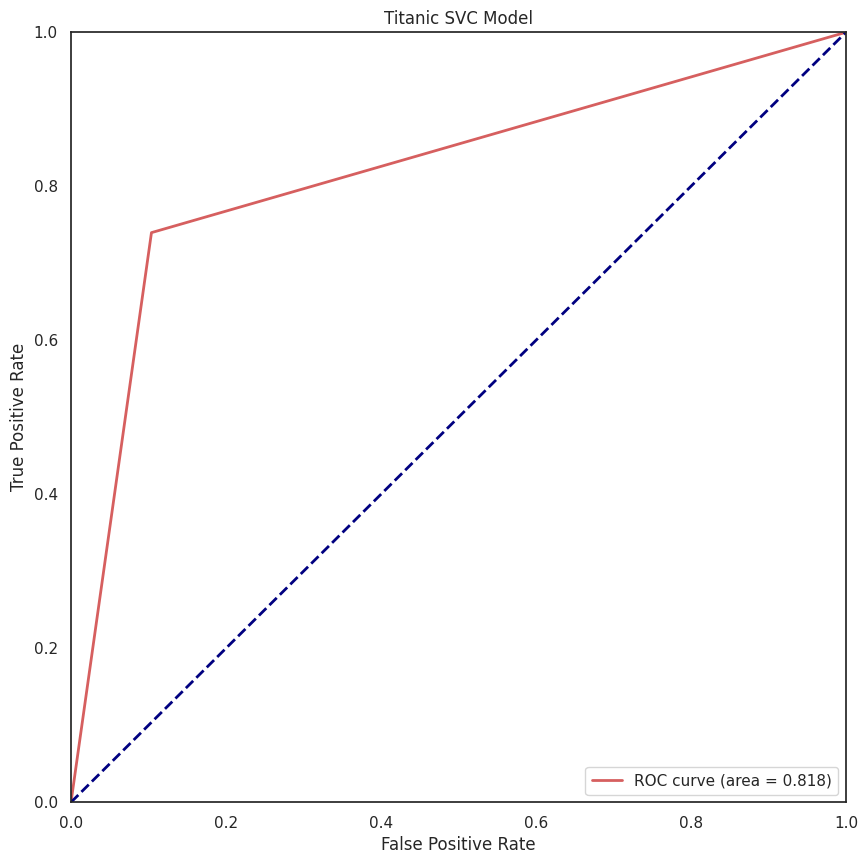

In [95]:
# 查看模型ROC曲线
# 获取测试数据模型的预测值
# SVC模型
modelGsSVCtestpre_y = modelGsSVC.predict(experData_X).astype(int)

# 画图
from sklearn.metrics import roc_curve, auc  # 导入计算roc和auc的函数

# 计算ROC曲线和ROC面积
fpr, tpr, threshold = roc_curve(experData_y, modelGsSVCtestpre_y)  # 计算真正率和假正率
roc_auc = auc(fpr, tpr)  # 计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic SVC Model')
plt.legend(loc="lower right")
plt.show()

#3.4 Confusion Matrix（混淆矩阵）

In [97]:
# 导入混淆矩阵函数
from sklearn.metrics import confusion_matrix

# 打印各模型的混淆矩阵
print('GradientBoostingClassifier模型混淆矩阵为\n', confusion_matrix(experData_y, modelGsGBCtestpre_y))
print('LogisticRegression模型混淆矩阵为\n', confusion_matrix(experData_y, modelGsLRtestpre_y))
print('SVC模型混淆矩阵为\n', confusion_matrix(experData_y, modelGsSVCtestpre_y))

GradientBoostingClassifier模型混淆矩阵为
 [[502  47]
 [ 82 260]]
LogisticRegression模型混淆矩阵为
 [[482  67]
 [ 76 266]]
SVC模型混淆矩阵为
 [[492  57]
 [ 89 253]]


#4 Model Prediction（模型预测）

In [101]:
# Titanic GBC Model
y_ = modelGsGBC.predict(predData_X)
y_ = y_.astype(int)

# 导出预测结果
GBCPreResultDf = pd.DataFrame()
GBCPreResultDf['PassengerId'] = full['PassengerId'][full['Survived'].isnull()]
GBCPreResultDf['Survived'] = y_

# 将预测结果导出为csv文件
GBCPreResultDf.to_csv('./Bryce_Titanic.csv', index=False)
display(GBCPreResultDf.head())

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1


In [102]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
